<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests
result = requests.get(url)

In [8]:
type(result)

requests.models.Response

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [18]:
first = soup.select('h2')[0]
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [22]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)
  


In [27]:
titles = [tag.text.strip() for tag in soup.select('h2')]
len(titles)


95

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [29]:
long_titles = []
for title in titles:
  if len(title)>80:
    long_titles.append(title)
long_titles  

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [32]:
long_titles = [title for title in titles if len(title)>80 ]
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [33]:
def long(title):
  return len(title)>80

long('¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks')

True

In [35]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [36]:
list(filter(lambda t: len(t)>80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200


In [39]:
df = pd.DataFrame({'title' : titles})
df[df['title'].str.len()>80]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [0]:
df['title length']= df['title'].apply(len)


### title length

In [43]:
df.loc[df['title length']>80,'title length']

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title length, dtype: int64

### long title

In [45]:
df['long title'] = df['title length'] > 80
df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [50]:
df[df['long title'] == True]
#df[~df['long title']]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [54]:
df['first letter']=df['title'].str[0]
df[df['first letter']=='P']

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [58]:
'python is good'.startswith('p')
df[df['title'].str.contains('neural')]

,title,title length,long title,first letter
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [59]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 7.6MB/s 


In [0]:
import textstat

In [62]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)
df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [63]:
df[df['title word count']<= 3]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [66]:
df = df.rename(columns = {'title length':'title character count'})
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [71]:
#df.describe()
#df.describe(include='all')
df.describe(exclude = 'number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Floats are Friends: making the most of IEEE754.00000000000000002,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [73]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


Titles sorted reverse alphabetically

In [74]:
df.sort_values(by='first letter', ascending = False).head(5)

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [75]:
df['first letter'].value_counts()

T    12
A    11
P     8
M     8
E     7
S     6
B     6
H     5
G     4
D     4
L     4
W     4
F     3
C     3
R     2
I     2
O     1
t     1
5     1
U     1
8     1
¡     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [78]:
#df['long title'].value_counts() / len(df)
df['long title'].value_counts(normalize = True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

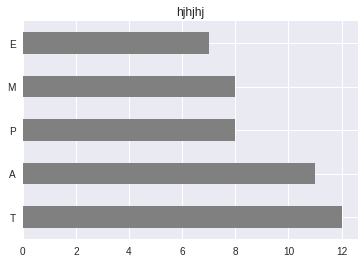

In [91]:
% matplotlib inline
(df['first letter']
 .value_counts()
 .head(5)
.plot.barh(color = 'grey', title = 'hjhjhj'));

Histogram of title lengths, in characters

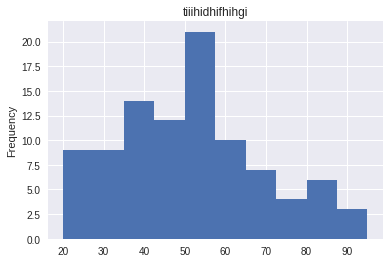

In [86]:
title = 'tiiihidhifhihgi'
df['title character count'].plot.hist(title =title)

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [140]:
#checking request and stripped version
descriptions = soup.select('.presentation-description')
descriptions[0].text.strip().replace('\r\n\r\n',' ')

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [196]:
#creating new column using list comprehension
df['description'] = [description.text.strip().replace('\r\n\r\n',' ').replace('\r\n+','.') for description in descriptions]
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count,description grade level
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",760,135,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,504,84,17.3
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",644,96,9.5


In [197]:
#creating  new columns with character count and word count
df['description character count'] = df['description'].str.len()
df['description word count'] = df['description'].apply(textstat.lexicon_count)
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count,description grade level
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",760,135,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,504,84,17.3
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",644,96,9.5


In [198]:
#What's the average description word count? 130.821053
#The minimum? 20
#The maximum? 421
df.describe()

,title character count,title word count,description character count,description word count,description grade level
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,808.484211,130.821053,14.288421
std,17.729509,3.218890,412.507069,64.357872,7.300843
min,20.000000,2.000000,121.000000,20.000000,5.600000
25%,37.000000,6.000000,539.500000,85.500000,10.350000
50%,52.000000,7.000000,718.000000,116.000000,12.000000
75%,62.000000,9.500000,1010.500000,165.000000,16.150000
max,95.000000,19.000000,2818.000000,421.000000,48.900000


In [199]:
#tweet is max 280 characters so...
answerlist = df[df['description character count']<=280]['description']
list(answerlist)[0]

"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure."

In [200]:
#checking there is only one tweetable description
df['description character count'].sort_values()[:5]

54    121
1     296
77    334
44    336
8     337
Name: description character count, dtype: int64

In [201]:
#onto the stretch goals
df['description grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count,description grade level
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",760,135,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,504,84,17.3
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",644,96,9.5


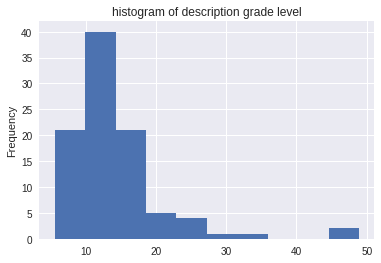

In [202]:
df['description grade level'].plot.hist(title ='histogram of description grade level')

In [203]:
#finding instances where grade level is greater than 20
levelchecker = df[df['description grade level']>20].copy()
#list(levelchecker['description'])[0]
levelchecker['description'].loc[34]

'Methane, the primary component of natural gas, is a 60 times more powerful climate change agent than carbon dioxide.  Current technologies for finding methane leaks in oil and gas infrastructure rely on driving well to well with a handheld camera.  At Kairos Aerospace, we have developed a plane-mounted sensor for detecting methane leaks, but the sensor is only part of the solution: getting information off the sensor and into customers’ hands required us to build an entire plane-to-report pipeline.  I’ll discuss the challenges we faced in developing a scalable, reliable, and cost-effective scientific computing platform in Python, with examples of novel solutions using Python’s extensive ecosystem of GIS, cloud computing and machine learning tools.'

In [204]:
#this sentence seems to have a lot of dashes which are makign simple words seem complicated on teh syllable count maybe.try replacing them with spaces and recalculationf
trialsentence = levelchecker['description'].loc[34].replace('-',' ').replace(':','.').replace('60','sixty')
textstat.flesch_kincaid_grade(trialsentence)
#i trie da few things but nothing gets the score down

50.5

In [208]:
#can't see why this sentnce is giving a crazy score either apart from very long sentences
levelchecker['description'].loc[68]

"While high-level security concepts may transcend languages, each language has its own sets of tools and edge cases that are worth knowing.  Python is one of many popular languages that is rarely the focus in security training, but that doesn't mean python code is automatically secure (no matter what the internet tells you).  Learn why people who say “pylint will help you with security” aren’t doing you any favours, how to use Bandit for security-focused linting and talk about other options for static analysis.  Take a deeper look at why scanning for publicly known vulnerabilities is complicated, and how to use Pyup Safety to make it easier.  We’ll also explore some language myths and best practices."